# Project 2 - Perform Facial Recognition with Deep Learning in Keras Using CNN

In [1]:
import pandas as pd
import numpy as np
import zipfile
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

## Task 1 - Import a 311 NYC service request.

In [2]:
with zipfile.ZipFile('Data Science with Python Two.zip','r') as zip_ref:
    zip_ref.extractall('Project 01 - Customer Service Requests Analysis')

In [3]:
nycsr = pd.read_csv('Project 01 - Customer Service Requests Analysis/311_Service_Requests_from_2010_to_Present.csv',parse_dates=['Created Date','Closed Date','Due Date','Resolution Action Updated Date'])
nycsr.head(3)

c:\users\jude\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [4]:
nycsr['Agency'].value_counts()

NYPD    300698
Name: Agency, dtype: int64

In [5]:
nycsr = nycsr[['Created Date','Closed Date','Agency Name','Complaint Type','Descriptor','City','Status','Borough','Location Type','Location','Latitude','Longitude']]
nycsr.head(3)

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,City,Status,Borough,Location Type,Location,Latitude,Longitude
0,2015-12-31 23:59:45,2016-01-01 00:55:00,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,NEW YORK,Closed,MANHATTAN,Street/Sidewalk,"(40.86568153633767, -73.92350095571744)",40.865682,-73.923501
1,2015-12-31 23:59:44,2016-01-01 01:26:00,New York City Police Department,Blocked Driveway,No Access,ASTORIA,Closed,QUEENS,Street/Sidewalk,"(40.775945312321085, -73.91509393898605)",40.775945,-73.915094
2,2015-12-31 23:59:29,2016-01-01 04:51:00,New York City Police Department,Blocked Driveway,No Access,BRONX,Closed,BRONX,Street/Sidewalk,"(40.870324522111424, -73.88852464418646)",40.870325,-73.888525


In [6]:
nycsr.shape

(300698, 12)

In [7]:
nycsr.dtypes

Created Date      datetime64[ns]
Closed Date       datetime64[ns]
Agency Name               object
Complaint Type            object
Descriptor                object
City                      object
Status                    object
Borough                   object
Location Type             object
Location                  object
Latitude                 float64
Longitude                float64
dtype: object

In [8]:
nycsr.isnull().sum()

Created Date         0
Closed Date       2164
Agency Name          0
Complaint Type       0
Descriptor        5914
City              2614
Status               0
Borough              0
Location Type      131
Location          3540
Latitude          3540
Longitude         3540
dtype: int64

In [9]:
nycsr['Descriptor'] = nycsr['Descriptor'].fillna('Unspecified')

In [10]:
# since there are around 4500 null values in the dataset, in the interest of accuracy, it would be better to delete observations with these null values, which would be roughly 1% of the total dataset of 364558 observations
nycsr = nycsr.dropna()
nycsr.shape

(296939, 12)

In [11]:
nycsr.isnull().sum()

Created Date      0
Closed Date       0
Agency Name       0
Complaint Type    0
Descriptor        0
City              0
Status            0
Borough           0
Location Type     0
Location          0
Latitude          0
Longitude         0
dtype: int64

In [12]:
nycsr['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee'],
      dtype=object)

In [13]:
nycsr['Location Type'].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge'], dtype=object)

In [14]:
nycsr['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [15]:
nycsr.describe()

,Latitude,Longitude
count,296939.000000,296939.000000
mean,40.725887,-73.925623
std,0.082018,0.078444
min,40.499135,-74.254937
25%,40.669789,-73.972114
50%,40.718663,-73.931780
75%,40.781875,-73.876805
max,40.912869,-73.700760


## Task 2 - Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [16]:
nycsr['Closed Date'].value_counts()

2015-11-08 07:34:00    24
2015-10-11 07:03:00    22
2015-12-08 07:44:00    18
2015-05-10 07:01:00    18
2015-12-07 23:17:00    17
                       ..
2015-09-27 22:00:47     1
2015-12-15 00:33:44     1
2015-04-11 02:36:00     1
2015-09-21 17:28:16     1
2015-05-06 16:47:00     1
Name: Closed Date, Length: 236021, dtype: int64

In [17]:
max(nycsr['Closed Date'])

Timestamp('2016-01-03 16:22:00')

In [18]:
#since there are a lot of closed date with null values, it would be better to replace the null values with the last closed date or max of closed date, which, coincidentally has the highest frequency
nycsr['Closed Date'] = nycsr['Closed Date'].fillna(max(nycsr['Closed Date']))
nycsr['Closed Date'].value_counts()

2015-11-08 07:34:00    24
2015-10-11 07:03:00    22
2015-12-08 07:44:00    18
2015-05-10 07:01:00    18
2015-12-07 23:17:00    17
                       ..
2015-09-27 22:00:47     1
2015-12-15 00:33:44     1
2015-04-11 02:36:00     1
2015-09-21 17:28:16     1
2015-05-06 16:47:00     1
Name: Closed Date, Length: 236021, dtype: int64

In [19]:
nycsr['Request_Closing_Time'] = nycsr['Closed Date']-nycsr['Created Date']
nycsr['Request_Closing_Time'].head()

0   0 days 00:55:15
1   0 days 01:26:16
2   0 days 04:51:31
3   0 days 07:45:14
4   0 days 03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [20]:
nycsr['Created_Time'] = nycsr['Created Date'].dt.hour
nycsr['Created_Time'].head()

0    23
1    23
2    23
3    23
4    23
Name: Created_Time, dtype: int64

In [21]:
nycsr['Descriptor'].value_counts()

Loud Music/Party                  60445
No Access                         56725
Posted Parking Sign Violation     22103
Loud Talking                      21254
Partial Access                    19951
With License Plate                17506
Blocked Hydrant                   15837
Commercial Overnight Parking      11908
Car/Truck Music                   11114
Blocked Sidewalk                  10930
Unspecified                        5830
Double Parked Blocking Traffic     5558
Double Parked Blocking Vehicle     4147
Engine Idling                      4134
Banging/Pounding                   4090
Neglected                          3771
Car/Truck Horn                     3477
Congestion/Gridlock                2737
In Prohibited Area                 2017
Other (complaint details)          1961
Unlicensed                         1756
Overnight Commercial Storage       1746
Unauthorized Bus Layover           1333
Truck Route Violation              1010
In Public                           923


In [22]:
#since there are lot of null values in descriptors variable, it would make sense to replace it with the complaint having highest frequency 'No Access'
nycsr['Descriptor'] = nycsr['Descriptor'].fillna('No Access')
nycsr['Descriptor'].isnull().sum()

0

In [23]:
nycsr['Location Type'].value_counts()

Street/Sidewalk               246265
Store/Commercial               20116
Club/Bar/Restaurant            17194
Residential Building/House      6943
Park/Playground                 4645
House of Worship                 920
Residential Building             226
Highway                          211
Parking Lot                      116
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Name: Location Type, dtype: int64

## Task 3 - Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

<AxesSubplot:title={'center':'Most Common Complaints'}>

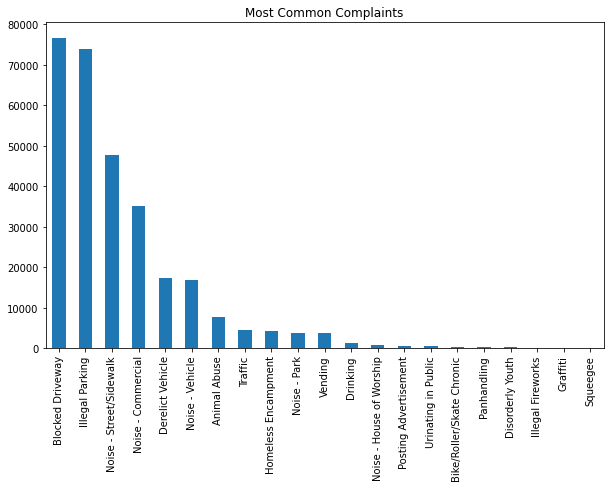

In [24]:
# What are different type of Complaints? Which is most/least frequent?
(nycsr['Complaint Type'].value_counts()).plot(kind='bar',figsize=(10,6),title = 'Most Common Complaints')

<AxesSubplot:title={'center':'Complaints Distribution Across Boroughs'}, ylabel='Borough'>

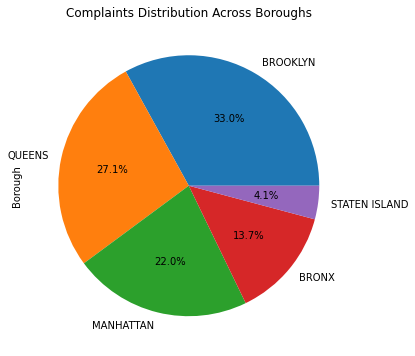

In [25]:
# From which borough most complaints come from?
(nycsr['Borough'].value_counts()).plot(kind='pie',autopct='%1.1f%%',figsize=(10,6),title='Complaints Distribution Across Boroughs')

(array([     0.,      0.,      0.,      0.,      0., 296939.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

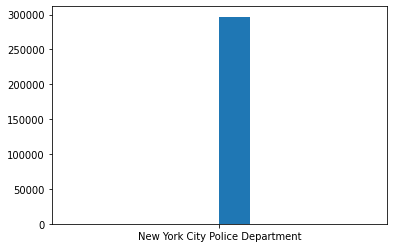

In [26]:
# Which agencies are more efficient in solving complaints?
nycsr['Agency Name'] = nycsr['Agency Name'].replace('NYPD','New York City Police Department')
plt.hist(nycsr['Agency Name'])

<AxesSubplot:title={'center':'Volume of complaints during the day'}>

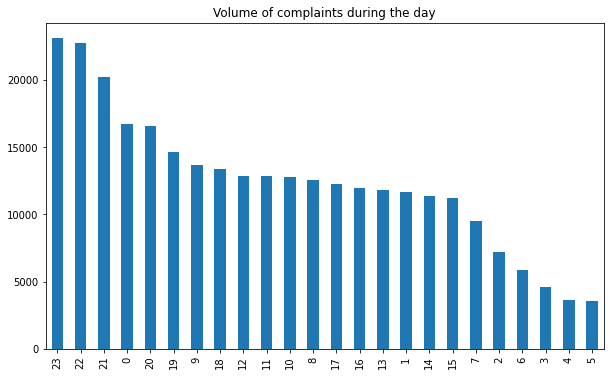

In [27]:
# Which complaints peaks at what time of day?
nycsr['Created_Time'].value_counts().plot(kind='bar',figsize=(10,6),title='Volume of complaints during the day')

<AxesSubplot:title={'center':'Volume of Complaints Against Type'}>

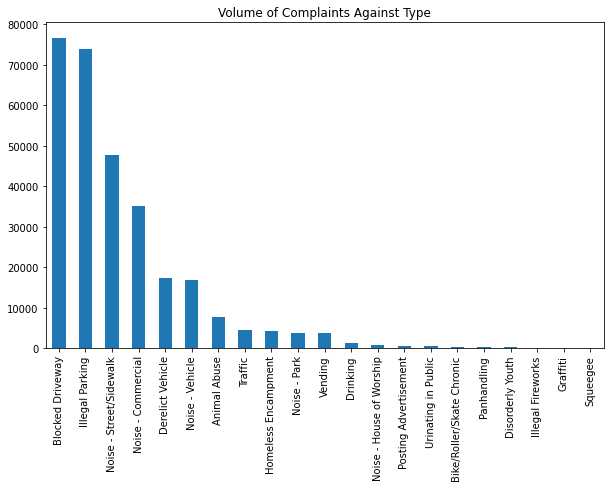

In [28]:
# From which type of location we get most number of complaints?
nycsr['Complaint Type'].value_counts().plot(kind='bar',figsize=(10,6),title='Volume of Complaints Against Type')

c:\users\jude\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


(-74.2826460631096, -73.6730515268904, 40.478447910999996, 40.933555509)

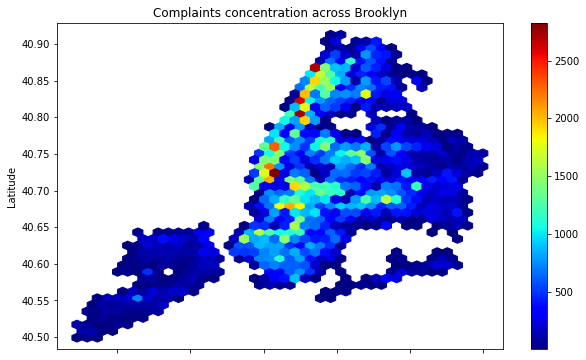

In [29]:
nycsr.plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=40,colormap='jet',mincnt=1,title='Complaints concentration across Brooklyn',figsize=(10,6)).axis('equal')

## Task 4 - Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [30]:
nycsr['Request_Closing_Time_secs'] = nycsr['Request_Closing_Time'].dt.total_seconds()
nycsr['Request_Closing_Time_hrs'] = nycsr['Request_Closing_Time_secs']/60#*(2.77778e-13)
nycsr['Request_Closing_Time_hrs'].head()

0     55.250000
1     86.266667
2    291.516667
3    465.233333
4    207.033333
Name: Request_Closing_Time_hrs, dtype: float64

In [31]:
nycsr_group = pd.DataFrame(nycsr.groupby(['City','Complaint Type'])['Request_Closing_Time_hrs'].mean()).reset_index()
nycsr_group['Request_Closing_Time_hrs'] = nycsr_group['Request_Closing_Time_hrs'].astype(int)
nycsr_group

,City,Complaint Type,Request_Closing_Time_hrs
0,ARVERNE,Animal Abuse,129
1,ARVERNE,Blocked Driveway,151
2,ARVERNE,Derelict Vehicle,178
3,ARVERNE,Disorderly Youth,215
4,ARVERNE,Drinking,14
...,...,...,...
758,Woodside,Blocked Driveway,384
759,Woodside,Derelict Vehicle,298
760,Woodside,Illegal Parking,313
761,Woodside,Noise - Commercial,143


## Task 5 - Perform a statistical test for the following: 
1. Whether the average response time across complaint types is similar or not (overall) 
2. Are the type of complaint or service requested and location related

## Is the average response time across complaint types similar or not (overall)?
1. Null Hypothesis : The average response time across complaint types is similar
2. Alternate Hypothesis : The average response time across complaint types is not similar

In [32]:
top_5_complaint_type = nycsr['Complaint Type'].value_counts().head()
top_5_complaint_type

Blocked Driveway           76676
Illegal Parking            74021
Noise - Street/Sidewalk    47747
Noise - Commercial         35145
Derelict Vehicle           17506
Name: Complaint Type, dtype: int64

In [33]:
top_5_complaint_type_names = top_5_complaint_type.index
top_5_complaint_type_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [34]:
sample_data_customer_type = nycsr.loc[nycsr['Complaint Type'].isin(top_5_complaint_type_names),['Complaint Type','Request_Closing_Time_hrs']]
sample_data_customer_type.head()

,Complaint Type,Request_Closing_Time_hrs
0,Noise - Street/Sidewalk,55.250000
1,Blocked Driveway,86.266667
2,Blocked Driveway,291.516667
3,Illegal Parking,465.233333
4,Illegal Parking,207.033333


In [35]:
sample_data_customer_type.shape

(251095, 2)

In [36]:
s1 = sample_data_customer_type[sample_data_customer_type['Complaint Type']==top_5_complaint_type_names[0]].Request_Closing_Time_hrs
s1.head()

1      86.266667
2     291.516667
7     107.916667
9      83.033333
10    468.033333
Name: Request_Closing_Time_hrs, dtype: float64

In [37]:
s2 = sample_data_customer_type[sample_data_customer_type['Complaint Type']==top_5_complaint_type_names[1]].Request_Closing_Time_hrs
s2.head()

3    465.233333
4    207.033333
5    113.500000
6    117.466667
8    513.033333
Name: Request_Closing_Time_hrs, dtype: float64

In [38]:
s3 = sample_data_customer_type[sample_data_customer_type['Complaint Type']==top_5_complaint_type_names[2]].Request_Closing_Time_hrs
s3.head()

0      55.250000
12    148.950000
19     47.083333
38     29.466667
54     89.733333
Name: Request_Closing_Time_hrs, dtype: float64

In [39]:
s4 = sample_data_customer_type[sample_data_customer_type['Complaint Type']==top_5_complaint_type_names[3]].Request_Closing_Time_hrs
s4.head()

17     51.133333
18    176.016667
22     75.700000
29    149.983333
30    119.150000
Name: Request_Closing_Time_hrs, dtype: float64

In [40]:
s5 = sample_data_customer_type[sample_data_customer_type['Complaint Type']==top_5_complaint_type_names[4]].Request_Closing_Time_hrs
s5.head()

14     629.383333
151    237.016667
255     81.883333
256    247.983333
295     45.200000
Name: Request_Closing_Time_hrs, dtype: float64

In [41]:
stats.f_oneway(s1, s2, s3, s4, s5)

F_onewayResult(statistic=1789.8760711625562, pvalue=0.0)

Since the p-value is less than 0.05, null hypothesis is rejected. Hence the average response time across complaint types is not similar.

## Are the type of complaint or service requested and location related?
1. Null Hypothesis : The complaint type and location are related
2. Alternate Hypothesis : The complaint type and location are not related

In [42]:
#chi square
top_5_location = nycsr['City'].value_counts().head()
top_5_location

BROOKLYN         98057
NEW YORK         65365
BRONX            40576
STATEN ISLAND    12324
JAMAICA           7276
Name: City, dtype: int64

In [43]:
top_5_location_names = top_5_location.index
top_5_location_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA'], dtype='object')

In [44]:
sample_data_location_type = nycsr.loc[(nycsr['Complaint Type'].isin(top_5_complaint_type_names))&(nycsr['City'].isin(top_5_location_names)),['Complaint Type','City']]
sample_data_location_type

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK
...,...,...
300691,Noise - Commercial,NEW YORK
300692,Noise - Commercial,NEW YORK
300695,Noise - Commercial,BROOKLYN
300696,Noise - Commercial,BRONX


In [45]:
table = pd.crosstab(sample_data_location_type['Complaint Type'],sample_data_location_type['City'],margins=True)
table

City,BRONX,BROOKLYN,JAMAICA,NEW YORK,STATEN ISLAND,All
Complaint Type,,,,,,
Blocked Driveway,12740,28119,2815,2055,2141,47870
Derelict Vehicle,1948,5164,953,530,1762,10357
Illegal Parking,7829,27386,1419,11979,4881,53494
Noise - Commercial,2431,11451,427,14529,677,29515
Noise - Street/Sidewalk,8865,13316,328,20266,815,43590
All,33813,85436,5942,49359,10276,184826


In [46]:
ch2,p_value,df,exp_frq = chi2_contingency(table)
print("ch2 = {}\np-value = {}" .format(ch2,p_value))

ch2 = 40498.5539022086
p-value = 0.0


Since the p-value is less than 0.05, null hypothesis is rejected. Hence the complaint type and location are not related.

# ---X---